In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
from matplotlib import cm

plt.rcParams['font.family'] = 'Times New Roman'

In [8]:
real_address = '../../data/Same_ET_ST_result/Network1_SC_in_out.h5'

f_real = h5py.File(real_address,'r')
SC_ij = f_real['SC_ij'][:]
SC_ji = f_real['SC_ji'][:]
lat = f_real['lat'][:]
lon = f_real['lon'][:]
f_real.close()

real_address = '../../data/Same_ET_ST_result/Network1_SC.h5'

f_real = h5py.File(real_address,'r')
dis = f_real['dis'][:]
f_real.close()

in_degree = np.zeros((73,144))
out_degree = np.zeros((73,144))

for m in range (0,73,1):
    for n in range (0,144,1):

        in_degree_value = 0
        out_degree_value = 0

        for p in range (0,73,1):
            for q in range (0,144,1):
                if SC_ij[m,n,p,q] == 0:
                    continue
                else:
                    if dis[m,n,p,q]<=4000:
                        in_degree_value += SC_ji[m,n,p,q]*np.cos(lat[p]*np.pi/180)
                        out_degree_value += SC_ij[m,n,p,q]*np.cos(lat[p]*np.pi/180)

                    else:
                        continue
        in_degree[m,n] = in_degree_value
        out_degree[m,n] = out_degree_value

C:\Users\34322\AppData\Local\Temp\ipykernel_14884\3915528090.py:16: UserWarning: Rasterization of '<cartopy.mpl.contour.GeoContourSet object at 0x0000028D69787B10>' will be ignored


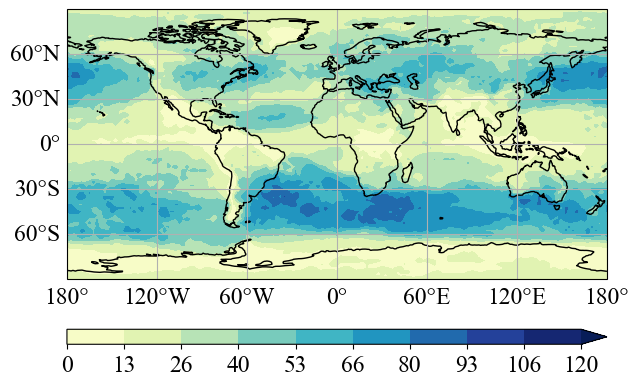

In [9]:
cyclic_data,cyclic_lon = add_cyclic_point(in_degree,coord = lon)

plt.rcParams['font.family'] = 'Times New Roman'
fig = plt.figure(figsize=(6,5))
ax1 = fig.add_axes([0.1,0.1,0.9,0.9],projection = ccrs.PlateCarree())
ax1.add_feature(cfeature.COASTLINE.with_scale('110m'))
gl = ax1.gridlines(draw_labels=True,x_inline=False, y_inline=False)
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 17}
gl.ylabel_style = {'size': 17}
c1 = ax1.contourf(cyclic_lon,lat,cyclic_data,cmap=cm.YlGnBu, levels = np.linspace(0,120,10),extend = 'max',transform = ccrs.PlateCarree())
colorbar = fig.add_axes([0.1,0.15,0.9,0.03])
cbar = fig.colorbar(c1,cax=colorbar,orientation='horizontal',format = '%d') 
cbar.ax.tick_params(labelsize=17)
c1.set_rasterized(True)
plt.savefig("FIG/FIGS2/FIGS2d.svg", bbox_inches='tight', dpi=400, transparent=True)
plt.show()

C:\Users\34322\AppData\Local\Temp\ipykernel_14884\1764327419.py:16: UserWarning: Rasterization of '<cartopy.mpl.contour.GeoContourSet object at 0x0000028D34B45FD0>' will be ignored


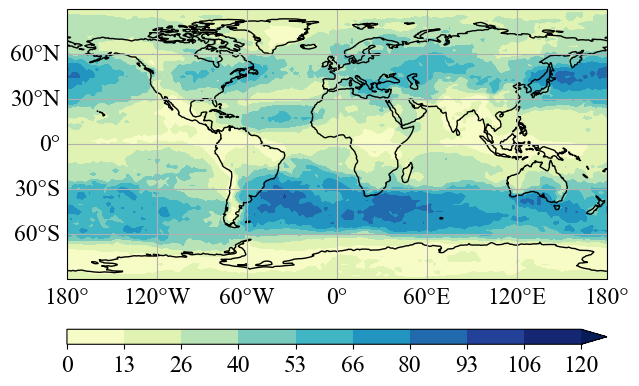

In [10]:
cyclic_data,cyclic_lon = add_cyclic_point(out_degree,coord = lon)

plt.rcParams['font.family'] = 'Times New Roman'
fig = plt.figure(figsize=(6,5))
ax1 = fig.add_axes([0.1,0.1,0.9,0.9],projection = ccrs.PlateCarree())
ax1.add_feature(cfeature.COASTLINE.with_scale('110m'))
gl = ax1.gridlines(draw_labels=True,x_inline=False, y_inline=False)
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 17}
gl.ylabel_style = {'size': 17}
c1 = ax1.contourf(cyclic_lon,lat,cyclic_data,cmap=cm.YlGnBu, levels = np.linspace(0,120,10),extend = 'max',transform = ccrs.PlateCarree())
colorbar = fig.add_axes([0.1,0.15,0.9,0.03])
cbar = fig.colorbar(c1,cax=colorbar,orientation='horizontal',format = '%d') 
cbar.ax.tick_params(labelsize=17)
c1.set_rasterized(True)
plt.savefig("FIG/FIGS2/FIGS2a.svg", bbox_inches='tight', dpi=400, transparent=True)
plt.show()